Confusion Matrix:
 [[65  3]
 [ 8 24]]
TP: 24, FP: 3, TN: 65, FN: 8
Accuracy: 0.89, Error rate: 0.11
Precision: 0.89, Recall: 0.75


<ipython-input-5-34054bd00ea4>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


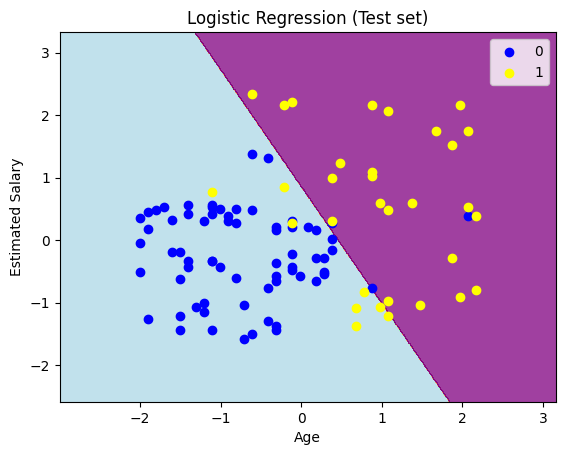

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/Social_Network_Ads.csv')

# Feature selection and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the Logistic Regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display results
print("Confusion Matrix:\n", cm)
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
print(f"Accuracy: {accuracy:.2f}, Error rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")

# Plot decision boundary with 4 colors
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('lightblue', 'lightgreen', 'coral', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('blue', 'yellow', 'red', 'purple'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


Confusion Matrix:
 [[65  3]
 [ 8 24]]
TP: 24, FP: 3, TN: 65, FN: 8
Accuracy: 0.89, Error rate: 0.11
Precision: 0.89, Recall: 0.75


<ipython-input-2-cfcf0c74c7b6>:63: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


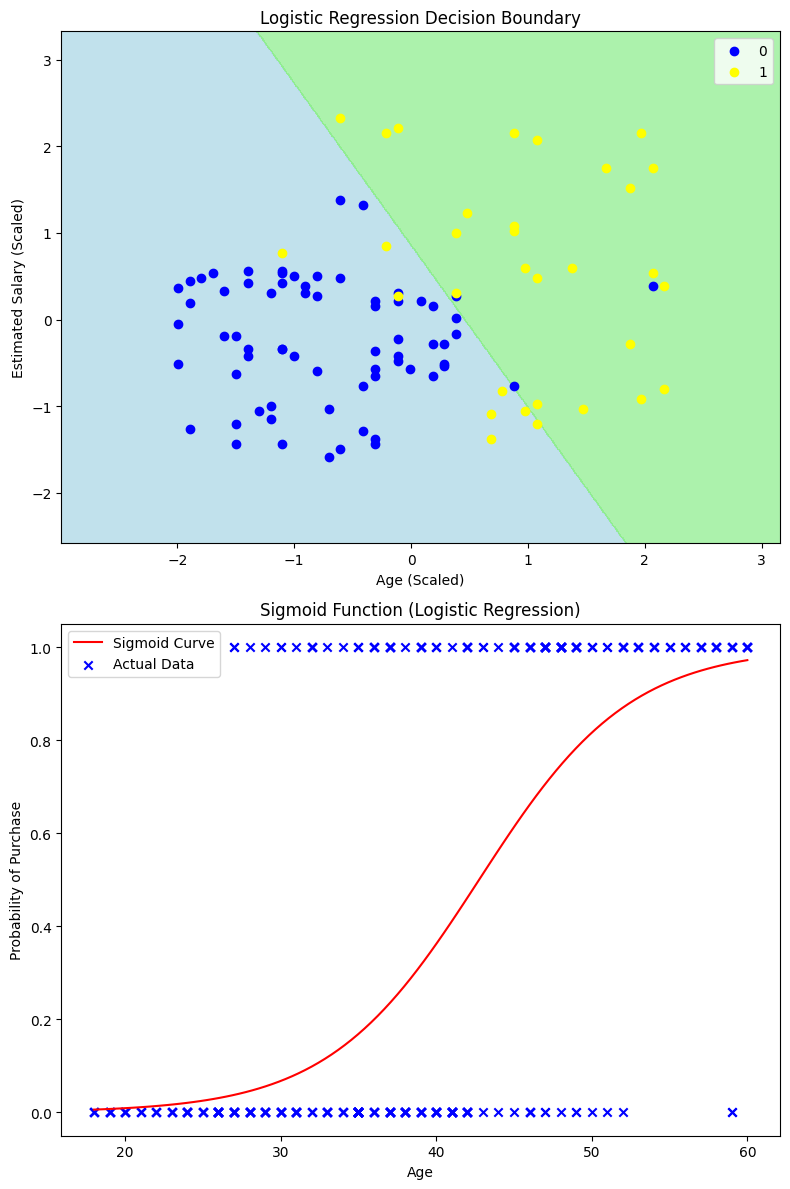

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from matplotlib.colors import ListedColormap

# Load dataset
data = pd.read_csv('/content/Social_Network_Ads.csv')

# Feature selection and target
X = data.iloc[:, [0, 1]].values  # Select two features (e.g., Age, Estimated Salary)
y = data.iloc[:, -1].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the Logistic Regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
TP, FP = cm[1][1], cm[0][1]
TN, FN = cm[0][0], cm[1][0]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display results
print("Confusion Matrix:\n", cm)
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
print(f"Accuracy: {accuracy:.2f}, Error rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")

# Plot decision boundary with sigmoid function
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.figure(figsize=(8, 12))

# First plot: Decision boundary
plt.subplot(2, 1, 1)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('lightblue', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('blue', 'yellow'))(i), label=j)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend()

# Second plot: Sigmoid function
plt.subplot(2, 1, 2)
X_age = np.linspace(X[:, 0].min(), X[:, 0].max(), 100).reshape(-1, 1)
X_age_scaled = sc.transform(np.hstack((X_age, np.zeros_like(X_age))))[:, 0].reshape(-1, 1)
probabilities = classifier.predict_proba(np.hstack((X_age_scaled, np.zeros_like(X_age_scaled))))[:, 1]

plt.plot(X_age, probabilities, color='red', label='Sigmoid Curve')
plt.scatter(X[:, 0], y, color='blue', marker='x', label='Actual Data')
plt.xlabel('Age')
plt.ylabel('Probability of Purchase')
plt.title('Sigmoid Function (Logistic Regression)')
plt.legend()

plt.tight_layout()
plt.show()


   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

Dataset Columns: Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Confusion Matrix:
[[50  2]
 [ 9 19]]

Performance Metrics:
True Positives (TP): 19
False Positives (FP): 2
True Negatives (TN): 50
False Negatives (FN): 9
Accuracy: 0.8625
Error Rate: 0.1375
Precision: 0.9048
Recall: 0.6786


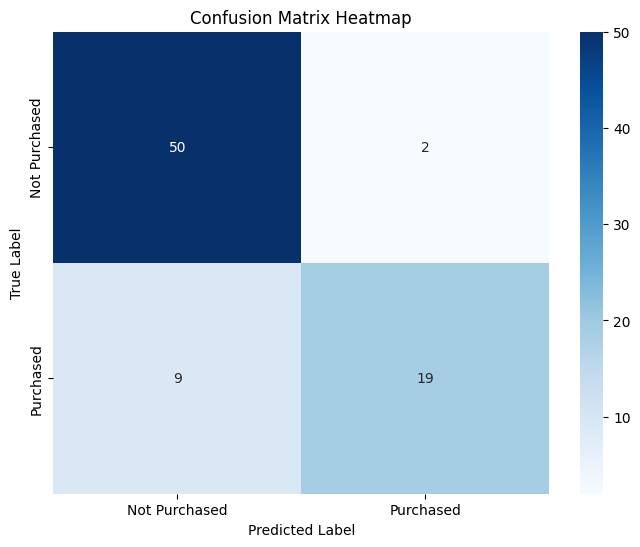

<ipython-input-7-f333c342cce0>:78: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


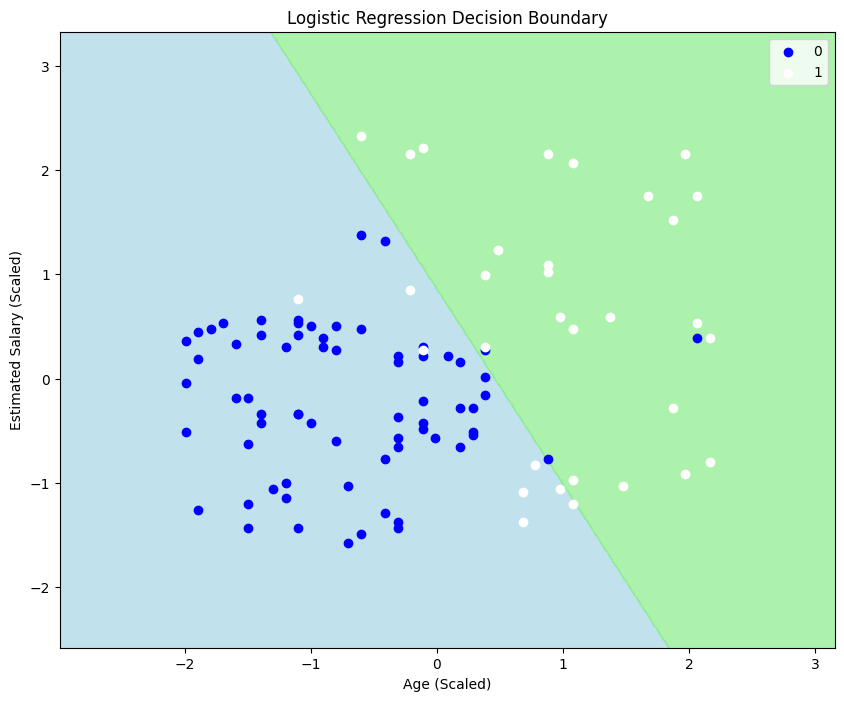

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load dataset
file_path = "Social_Network_Ads.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check column names
print("\nDataset Columns:", df.columns)

# Select relevant features and target variable
X = df[['Age', 'EstimatedSalary']].values  # Use column names directly
y = df['Purchased'].values      # Ensure target is correctly selected

# Split dataset into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print Confusion Matrix & Metrics
print("\nConfusion Matrix:")
print(cm)

print("\nPerformance Metrics:")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))  # Increased figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# First plot: Decision boundary
plt.figure(figsize=(10, 8))  # Increased decision boundary plot size
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('lightblue', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('blue', 'white'))(i), label=j)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend()
plt.show()


Enter the path to the CSV file: /content/Social_Network_Ads.csv
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
Confusion Matrix:
[[65  3]
 [ 8 24]]
True Positives (TP): 24
False Positives (FP): 3
True Negatives (TN): 65
False Negatives (FN): 8
Accuracy: 0.89
Error Rate: 0.11
Precision: 0.89


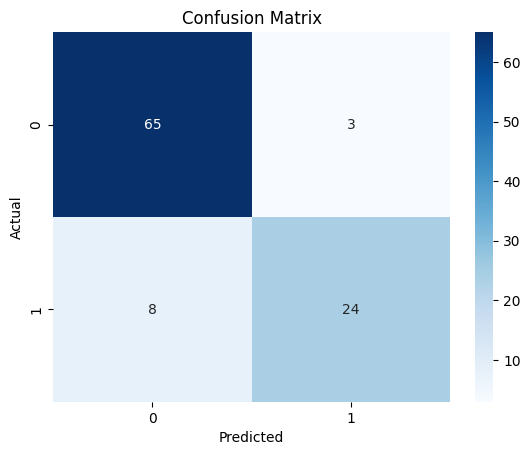

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# Prompt user for file path
file_path = input("Enter the path to the CSV file: ")

# Load dataset
df = pd.read_csv(file_path)

print(df.head())

# Selecting features and target variable
X = df.iloc[:, [0, 1]].values
Y = df.iloc[:, -1].values

# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the logistic regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

# Making predictions
Y_pred = classifier.predict(X_test)

# Evaluating the model
cm = confusion_matrix(Y_test, Y_pred)
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

accuracy = accuracy_score(Y_test, Y_pred)
error_rate = 1 - accuracy
precision = precision_score(Y_test, Y_pred)

# Printing results
print(f"Confusion Matrix:\n{cm}")
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")

# Visualizing the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
